In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats, interpolate
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

try:
  from mplsoccer.pitch import Pitch, VerticalPitch
  from mplsoccer import PyPizza, Radar
  from highlight_text import fig_text
except:
  !pip install mplsoccer
  !pip install highlight_text
  from mplsoccer.pitch import Pitch, VerticalPitch
  from mplsoccer import PyPizza, Radar
  from highlight_text import fig_text

In [ ]:
#Identifyig the unique events under the column 'Descrizione'
df = pd.read_csv('SICS-Serie A 2021-22_eventi.csv', sep = ';')
df.Descrizione.unique()

array(['Duello Vinto', 'Conduzione', 'Dribbling', 'Palle Laterali',
       'Tiro Subito', 'Passaggio', 'Passaggio Chiave Subito',
       'Azione Difesa', 'Recupera Palla', 'Parata', 'Perde Palla',
       'Palle Inattive Contro', 'Passaggio Chiave', 'Duello Perso',
       'In fuorigioco', 'Intervento  Decisivo', 'Fallo Subito', 'Fallo',
       'Dribbling Subito', 'Cross', 'Azione Attacco', 'Assist Subito',
       'Ammonizione', 'Subentro', 'Palle Laterali Subite', 'Tiro Fatto',
       'Palle Inattive Favore', 'Assist', 'Cross Subito',
       'Gioco Portiere', 'Sostituzione', 'Triangolazione',
       'Fuorigioco Provocato', 'Uscita', 'Triangolazione  Subita',
       'Rete Fatta', 'Rete Subita', 'Gol Procurato', 'Espulsione',
       'Interruzione  video'], dtype=object)

**Subset Passaggio Chiave**

In [ ]:
#Selecting only the Key Passess occurrencies
dfpc = df[(df.Descrizione == 'Passaggio Chiave')]
dfpc.Tags.unique()

array(['Assist, Non Vincente',
       'Verticalizzazione, Non Vincente, Third Pass',
       'Non Vincente, Assist', 'Verticalizzazione, Non Vincente',
       'Cambio Gioco, Non Vincente, Third Pass',
       'Cambio Gioco, Non Vincente',
       'Verticalizzazione, Non Vincente, Assist', 'Vincente, Assist',
       'Verticalizzazione, Vincente, Assist', 'Assist, Vincente',
       'Verticalizzazione, Vincente, Third Pass',
       'Cambio Gioco, Non Vincente, Third Pass per Se Stesso',
       'Cambio Gioco, Non Vincente, Assist',
       'Verticalizzazione, Non Vincente, Third Pass per Se Stesso',
       'Non Vincente', 'Cambio Gioco, Vincente, Third Pass per Se Stesso',
       'Verticalizzazione, Vincente, Third Pass per Se Stesso',
       'Cambio Gioco, Vincente, Third Pass', 'Non Vincente, Third Pass',
       'Cross, Non Vincente, Third Pass', 'Cross, Vincente, Third Pass',
       'Cambio Gioco, Vincente', 'Cambio Gioco, Vincente, Assist',
       'Verticalizzazione, Vincente'], dtype=obje

Passaggi Chiave Totali effettuati in SerieA

In [ ]:
pc_tot = dfpc.Descrizione.count()
print(f'passaggi chiave Totali effetuati {pc_tot}')
print(f'media passaggi chiave Totali effettuati a partita da una Squadra {(pc_tot / 38) /20}')

passaggi chiave Totali effetuati 21988
media passaggi chiave Totali effettuati a partita da una Squadra 28.931578947368422


Classifica Passaggi Chiave effettuati

In [ ]:
dfpc_t = pd.DataFrame()
dfpc_t['Passaggi_chiave_tot_effettuati'] = dfpc.groupby(dfpc['Squadra'])['Descrizione'].count().sort_values(ascending = False)
dfpc_t = dfpc_t.reset_index()
dfpc_t['Passaggi_chiave_tot_effettuati %'] = (dfpc_t['Passaggi_chiave_tot_effettuati'] / pc_tot) * 100
dfpc_t['Passaggi_chiave_tot_effettuati a partita'] = round(dfpc_t['Passaggi_chiave_tot_effettuati'] / 38, ndigits = 2)
dfpc_t

,Squadra,Passaggi_chiave_tot_effettuati,Passaggi_chiave_tot_effettuati %,Passaggi_chiave_tot_effettuati a partita
0,NAPOLI,1487,6.762780,39.13
1,SASSUOLO,1397,6.353466,36.76
2,INTER,1396,6.348918,36.74
3,JUVENTUS,1387,6.307986,36.50
4,MILAN,1235,5.616700,32.50
5,ROMA,1194,5.430235,31.42
6,FIORENTINA,1182,5.375659,31.11
7,LAZIO,1161,5.280153,30.55
8,BOLOGNA,1141,5.189194,30.03
9,EMPOLI,1095,4.979989,28.82


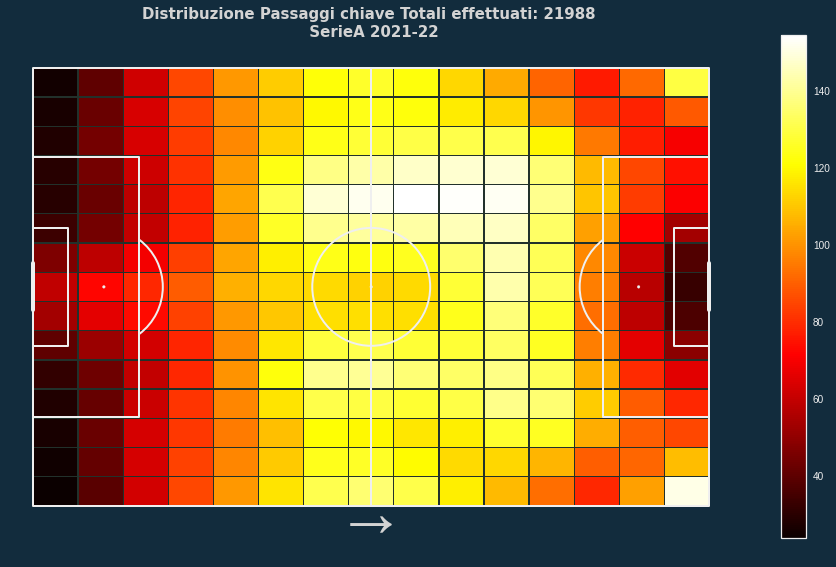

In [ ]:
#Osservo la distriubzione dei Passaggi Chiave effettuati nel campo
#Observing the 'kew passess effected' average distribution over the pitch

pitch = Pitch(pitch_type='uefa', line_zorder=2,
              pitch_color='#122c3d', line_color='#efefef')

fig, ax = pitch.draw(figsize=(13, 12))
ax.invert_yaxis()

fig.set_facecolor('#122c3d')
bin_statistic = pitch.bin_statistic(dfpc['P0 norm x'], dfpc['P0 norm y'], statistic='count', bins=(15, 15))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

plt.title(f'Distribuzione Passaggi chiave Totali effettuati: {pc_tot} \n SerieA 2021-22', color='lightgrey', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
             transform=ax.transAxes)

plt.tight_layout()
#plt.show()
plt.savefig('Distribuzione passaggi chiave effettuati non vincenti & vincenti.png')

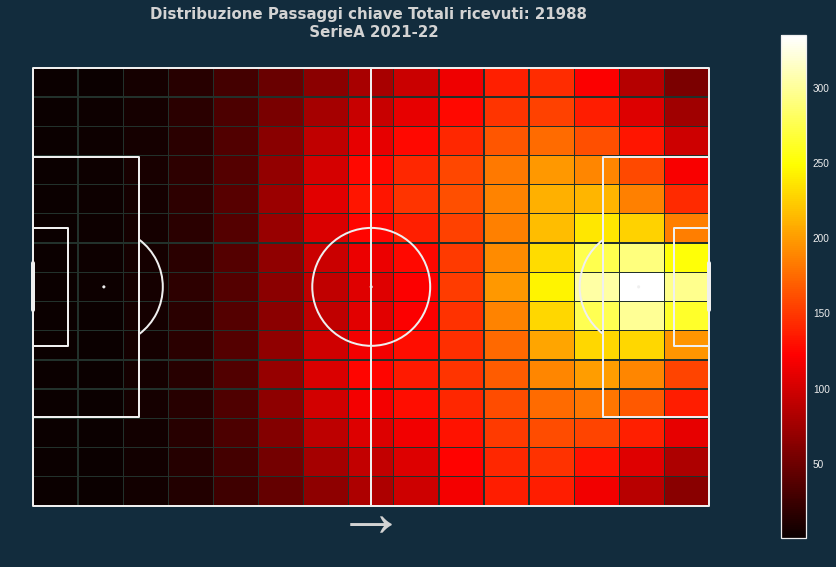

In [ ]:
#Osservo la distriubzione dei Passaggi Chiave ricevuti nel campo
#Observing the 'kew passess received' average distribution over the pitch

pitch = Pitch(pitch_type='uefa', line_zorder=2,
              pitch_color='#122c3d', line_color='#efefef')

fig, ax = pitch.draw(figsize=(13, 12))
ax.invert_yaxis()

fig.set_facecolor('#122c3d')
bin_statistic = pitch.bin_statistic(dfpc['P1 norm x'], dfpc['P1 norm y'], statistic='count', bins=(15, 15))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

plt.title(f'Distribuzione Passaggi chiave Totali ricevuti: {pc_tot} \n SerieA 2021-22', color='lightgrey', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
             transform=ax.transAxes)

plt.tight_layout()
#plt.show()
plt.savefig('Distribuzione passaggi chiave ricevuti nel campo.png')

Creo un nuovo dataframe dfpc_v in cui inserisco solamente i passaggi che ritengo **rilevanti**. Ovvero quelli che hanno fornito un goal o hanno favorito un tiro ravvicinato attraverso Assist o Verticalizzazione

In [ ]:
#creating the subset with only the key passess defined as 'Relevant' which means those that generated a goal or a shot by a vertical pass

rilevante = ['Assist, Non Vincente', 'Verticalizzazione, Non Vincente, Assist', 'Non Vincente, Assist', 'Vincente, Assist',
       'Verticalizzazione, Vincente, Assist', 'Assist, Vincente',
       'Verticalizzazione, Vincente, Third Pass', 'Cambio Gioco, Non Vincente, Assist', 'Cambio Gioco, Vincente, Third Pass per Se Stesso',
        'Verticalizzazione, Vincente, Third Pass per Se Stesso',
       'Cambio Gioco, Vincente, Third Pass','Cross, Vincente, Third Pass',
       'Cambio Gioco, Vincente', 'Cambio Gioco, Vincente, Assist',
       'Verticalizzazione, Vincente']

In [ ]:
dfpc_v = dfpc[dfpc.Tags.isin(rilevante)]
#dfpc_v.Tags.unique()
#dfpc_v-columns

In [ ]:
pc_rilevanti_tot = dfpc_v.groupby(dfpc_v['Squadra'])['Descrizione'].count().sum() #passaggi chiave Rilevanti in tutta la SerieA
pc_rilevanti_tot
print(f'passaggi chiave rilevanti Totali effetuati {pc_rilevanti_tot}')
print(f'media passaggi chiave rilevanti Totali effettuati a partita da una Squadra {(pc_rilevanti_tot / 38) /20}')

passaggi chiave rilevanti Totali effetuati 5978
media passaggi chiave rilevanti Totali effettuati a partita da una Squadra 7.865789473684211


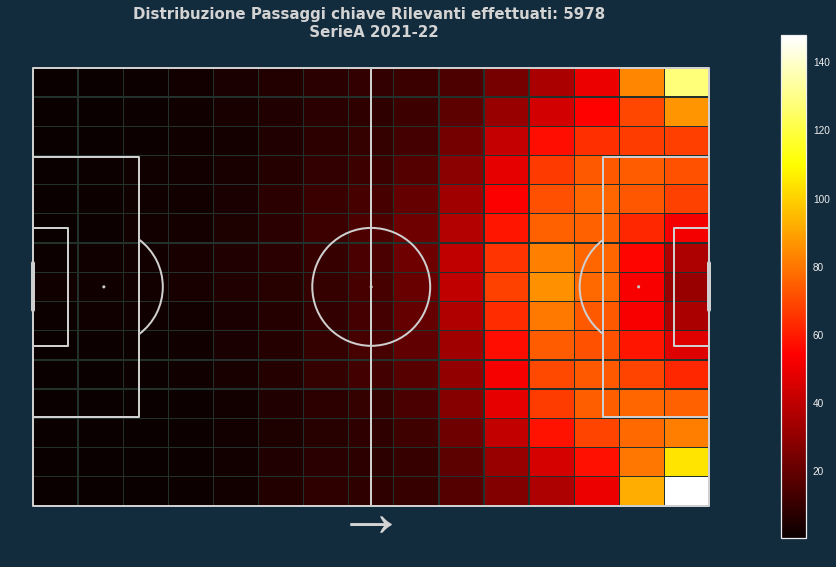

In [ ]:
#Osservo la distriubzione dei Passaggi Chiave Rilevanti effettuati nel campo

pitch = Pitch(pitch_type='uefa', line_zorder=2,
              pitch_color='#122c3d', line_color='#cfcfcf')
# draw
fig, ax = pitch.draw(figsize=(13,12))
ax.invert_yaxis()

fig.set_facecolor('#122c3d')
bin_statistic = pitch.bin_statistic(dfpc_v['P0 norm x'], dfpc_v['P0 norm y'], statistic='count', bins=(15, 15))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

ax_title = ax.set_title(f'Distribuzione Passaggi chiave Rilevanti effettuati: {pc_rilevanti_tot} \n SerieA 2021-22', color='lightgray', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
             transform=ax.transAxes)

plt.tight_layout()
plt.show()
#plt.savefig("Distribuzione passaggi chiave effettuati vincenti")

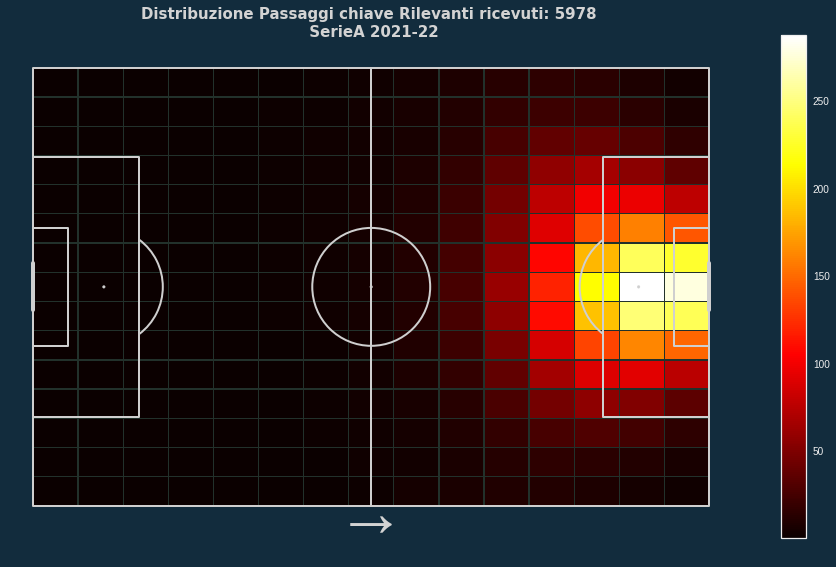

In [ ]:
#Osservo la distriubzione dei Passaggi Chiave Rilevanti ricevuti nel campo

pitch = Pitch(pitch_type='uefa', line_zorder=2,
              pitch_color='#122c3d', line_color='#cfcfcf')
# draw
fig, ax = pitch.draw(figsize=(13,12))
ax.invert_yaxis()

fig.set_facecolor('#122c3d')
bin_statistic = pitch.bin_statistic(dfpc_v['P1 norm x'], dfpc_v['P1 norm y'], statistic='count', bins=(15, 15))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

ax_title = ax.set_title(f'Distribuzione Passaggi chiave Rilevanti ricevuti: {pc_rilevanti_tot} \n SerieA 2021-22', color='lightgray', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
             transform=ax.transAxes)

plt.tight_layout()
plt.show()
#plt.savefig("Distribuzione passaggi chiave effettuati ricevuti)

Applico l'algoritmo **Kmeans**, utilizzo il metodo **Elbow** per identificare il numero "ottimale" di cluster al fine di individuare:
1.   Posizione delle cluster sul campo, sfruttando la distanza euclidea e l'uso dei centroidi
2.   Numero di passaggi chiave rilevanti per ogni cluster



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K = range(1,20)
wss= []
for k in K:
    array = np.array(dfpc_v[['P0 norm x', 'P0 norm y', 'P1 norm x', 'P1 norm y']])
    kmeans = KMeans(n_clusters = k, random_state = 50)
    kmeans.fit(array)
    wss_iter = kmeans.inertia_ #inertia_ : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters':K, 'WSS':wss})
mycenters

,Clusters,WSS
0,1,5.422837e+06
1,2,3.618109e+06
2,3,2.559914e+06
3,4,2.164936e+06
4,5,1.868043e+06
5,6,1.668293e+06
6,7,1.535413e+06
7,8,1.434371e+06
8,9,1.344461e+06
9,10,1.261054e+06


Text(0.5, 1.0, 'Elbow Method')

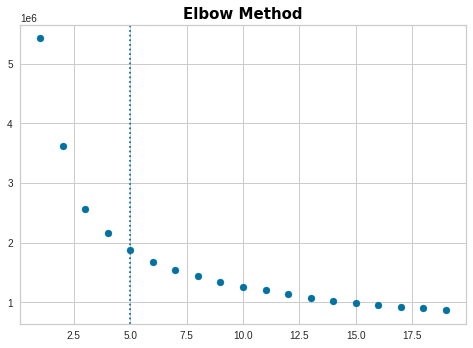

In [ ]:
#Elbow Plot
plt.scatter(x=mycenters['Clusters'], y=mycenters['WSS'])
plt.axvline(x=5, ls = ':')
plt.title("Elbow Method",color='black', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

In [ ]:
zz = np.array(dfpc_v[['P0 norm x', 'P0 norm y', 'P1 norm x', 'P1 norm y']]) #definisco il mio array che sottoporrò al Kmeans, includendo gli x,y di partenza e destinazione

kmeans = KMeans(n_clusters = 5, random_state = 100)

kmeans.fit(zz)

dfpc_v['cluster'] = kmeans.predict(zz)

# Creo un df per visualizzare le cluster e quanti passaggi chiave rilevanti sono stati effettuati al loro interno

art = pd.DataFrame(dfpc_v.cluster.value_counts().sort_values(ascending = False).reset_index())  #cluster.value_counts().index.tolist()[0:3]
art['pesi'] = (art.cluster / pc_rilevanti_tot) # per formula
art #come i 2713 sono spacchetati nelle cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,cluster,pesi
0,0,1728,0.289060
1,1,1641,0.274507
2,3,1259,0.210606
3,4,881,0.147374
4,2,469,0.078454


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
labels = kmeans.labels_
labels
centroids = kmeans.cluster_centers_ #print delle coordinate dei cetroidi
print(centroids)
metrics.silhouette_score(zz, labels, metric='euclidean') #calcolo score 30%, abbastanza discreto considerando il rumore nei punti tra P0 e P1 ed i cambi gioco

[[93.55947887 54.71329473 94.5751187  36.62949624]
 [80.17287279 26.23471698 86.07676202 27.62882532]
 [46.73323404 23.66778723 69.14848936 20.81951064]
 [95.28834921 11.25168254 95.68603175 31.97796032]
 [68.94764237 47.82171982 80.7242369  46.05498861]]


0.29162350025177713

Plot dei centroidi nel campo con indicazione dei Passaggi Chiave Rilevanti effettuati all'interno di essi

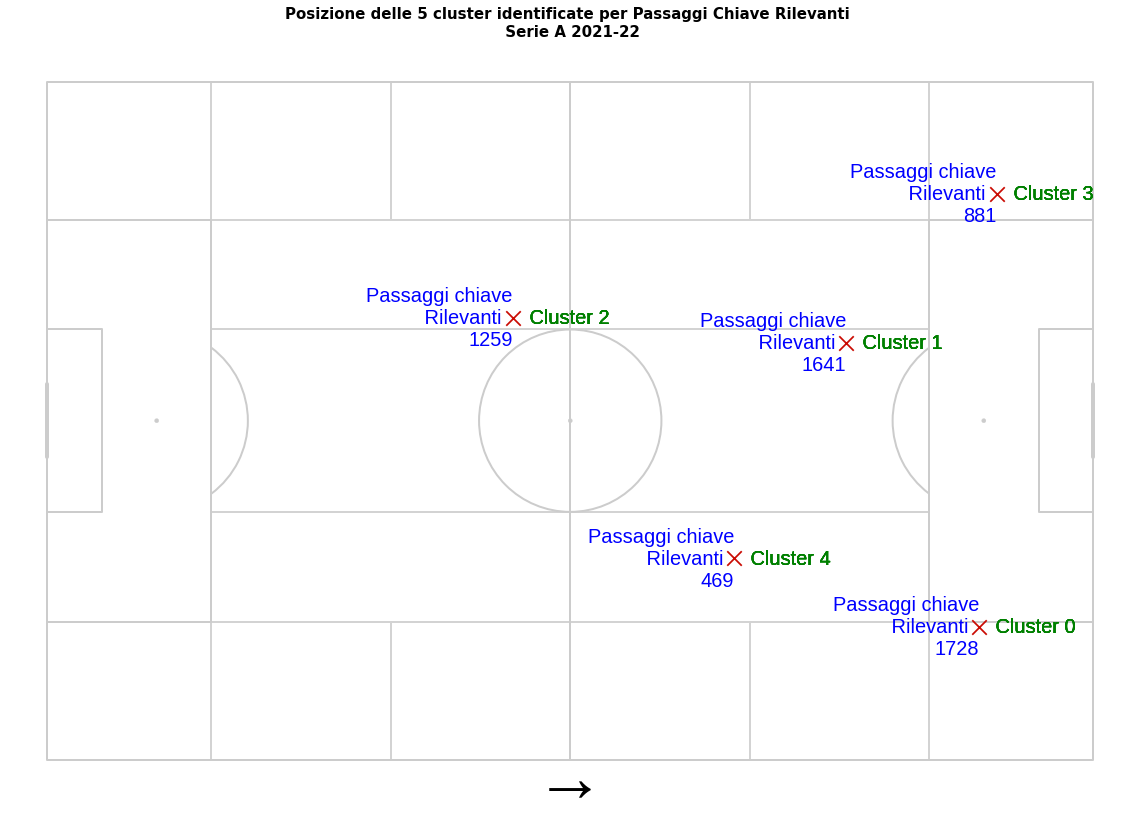

In [ ]:
pitch = Pitch(positional=True, pitch_type = 'uefa', line_zorder = 2, pitch_color='white', positional_color='lightgrey')

f, ax = pitch.draw(figsize=(16,12))
ax.invert_yaxis()



# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=210,
    linewidths=8,
    color="r",
    zorder=10,)

for i, txt in enumerate(art.cluster):
      ax.annotate(f'Passaggi chiave\n Rilevanti  \n{txt}', (centroids[:, 0][i], centroids[:, 1][i]),
            ha='right', va='center',color='blue', fontsize= 20)
      for i, txt in enumerate(art.index):
        ax.annotate(f'   Cluster {txt}', (centroids[:, 0][i], centroids[:, 1][i]),
            ha='left', va='center',color='green', fontsize= 20)

plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='black', size='70', \
             transform=ax.transAxes)

ax_title = ax.set_title(f'Posizione delle 5 cluster identificate per Passaggi Chiave Rilevanti \n Serie A 2021-22', color='black', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.tight_layout()
#plt.show()
plt.savefig("Cluster SerieA")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


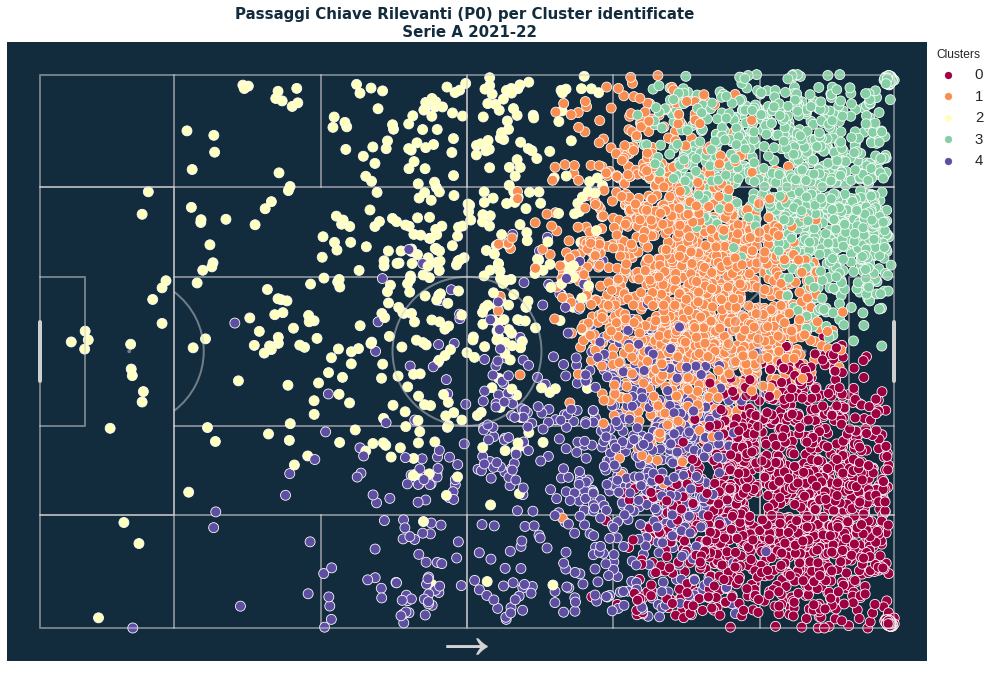

In [ ]:
#Passaggi Chiave Rilevanti (P0) per Cluster identificate

sns.color_palette('Spectral', as_cmap=True) #altre palette da utilizzare Wistia, autumn

pitch = Pitch(positional=True, pitch_type = 'uefa', pitch_color = '#122c3d', line_color = '#cfcfcf', line_zorder = 2, line_alpha=0.5)  ##altre pitch color palette da utilizzare 122c3d

f, ax = pitch.draw(figsize=(14,12))
ax.invert_yaxis()

ax.patch.set_facecolor('#122c3d')

dfpc_v['clusters'] = kmeans.labels_

sns.scatterplot(data =dfpc_v, x = dfpc_v['P0 norm x'], y = dfpc_v['P0 norm y'], palette = 'Spectral', hue = 'clusters',hue_order = np.arange(0,5).astype(str), s = 100, edgecolor='white', ax = ax)  #sfumatura pallini --> alpha=0.1,

plt.legend(title = 'Clusters', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 15)

plt.text(0.5, 0.019, "→", \
         horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
             transform=ax.transAxes)

ax_title = ax.set_title(f'Passaggi Chiave Rilevanti (P0) per Cluster identificate \n Serie A 2021-22', color='#122c3d', fontsize=15, loc='center', fontname="DejaVu Sans",fontweight="bold")

plt.tight_layout()

plt.show()

In [ ]:
dfpc_v['cluster_str'] = dfpc_v['cluster'].values.astype(str)
print(dfpc_v.dtypes)
dfpc_v['cluster_str']

Giornata            int64
Partita            object
Data               object
Epis.               int64
Squadra            object
Inizio             object
Fine               object
Inizio (s)        float64
Fine (s)          float64
Tempo              object
Descrizione        object
Tags               object
Giocatori          object
A Giocatore        object
ID Giocatori       object
ID A Giocatore    float64
P0 x              float64
P0 y              float64
P1 x              float64
P1 y              float64
P0 norm x         float64
P0 norm y         float64
P1 norm x         float64
P1 norm y         float64
Esito              object
Unnamed: 25       float64
cluster             int32
clusters            int32
cluster_str        object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


43        3
171       1
181       0
351       1
384       0
         ..
975999    0
976201    1
976267    1
976274    4
976331    1
Name: cluster_str, Length: 5978, dtype: object

In [ ]:
#dfpc_v[['Giocatori', 'A Giocatore', 'Inizio (s)', 'Fine (s)', 'Descrizione', 'Tags', 'cluster', 'cluster_str']]

In [ ]:
#creo delle dummy variables al fine di poter individuare in quale cluster il passaggio chiave sia stato effettuato; trasformandoli in Int

dfpc2 = pd.get_dummies(dfpc_v.cluster).rename(columns=lambda x:'cluster_' +str(x))

dfpc2.cluster_0 = dfpc2.cluster_0.astype(np.int)
dfpc2.cluster_1 = dfpc2.cluster_1.astype(np.int)
dfpc2.cluster_2 = dfpc2.cluster_2.astype(np.int)
dfpc2.cluster_3 = dfpc2.cluster_3.astype(np.int)
dfpc2.cluster_4 = dfpc2.cluster_4.astype(np.int)
dfpc2.info()
dfpc_v = pd.concat([dfpc_v, dfpc2], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 43 to 976331
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cluster_0  5978 non-null   int64
 1   cluster_1  5978 non-null   int64
 2   cluster_2  5978 non-null   int64
 3   cluster_3  5978 non-null   int64
 4   cluster_4  5978 non-null   int64
dtypes: int64(5)
memory usage: 280.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [ ]:
#dfpc_v.info()

In [ ]:
#dfpc_v.groupby(['Squadra', 'Tags', 'cluster_str'])['cluster'].count()

Dopo aver determinato le varie cluster, vado ad effettuare delle analisi specifiche con focus sulla cluster 1. Tale cluster denota particolare importanza per l'aspetto tecnico-tattico dato che comprende passaggi chiave rilevanti effettuati in Zona di rifinitura (e prevalentemente sul half space di sinistra).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


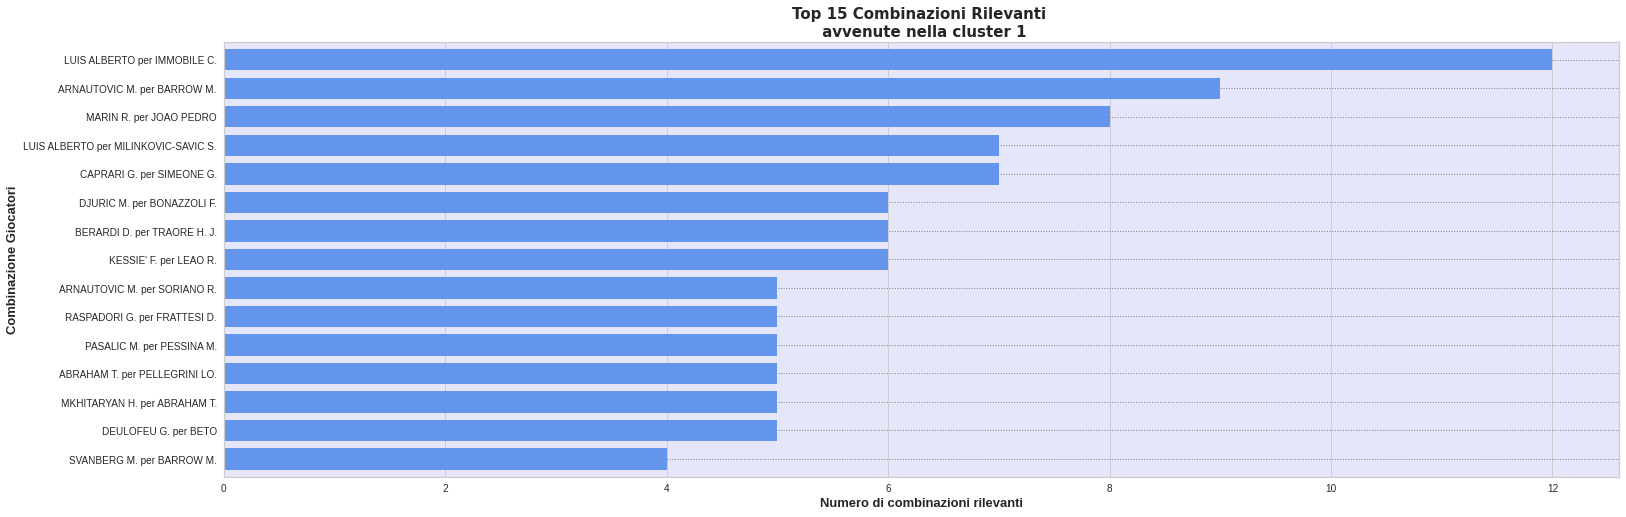

In [ ]:
##Focus: combianzione di giocatori

dfpc_uno = dfpc_v[dfpc_v.cluster_1 == 1]

dfpc_uno['combinazione_giocatori'] = dfpc_uno['Giocatori'] + ' per ' +  dfpc_uno['A Giocatore']

combinazione_1_custer = dfpc_uno.groupby(['combinazione_giocatori'])['Descrizione'].count().sort_values(ascending=False).head(15)

ax1 = combinazione_1_custer.plot(x='count', y='Giocatori', kind='barh', legend=False, stacked=True,width=0.75, color = 'cornflowerblue',  figsize=(25, 8), rot = 0)

ax1.invert_yaxis()
ax1.set_axisbelow(True)
ax1.grid(axis='y', color='grey', ls=':')
ax1.set_facecolor('lavender')
ax1.set_ylabel(ylabel = 'Combinazione Giocatori', weight='bold', size=13)
ax1.set_xlabel(xlabel = 'Numero di combinazioni rilevanti', weight='bold', size=13)

plt.title('Top 15 Combinazioni Rilevanti \n avvenute nella cluster 1', size=15, fontname="DejaVu Sans",fontweight="bold")

#plt.show()
plt.savefig("combinazioni.png")

In [ ]:
#tabella:
#combinazione_1_custer

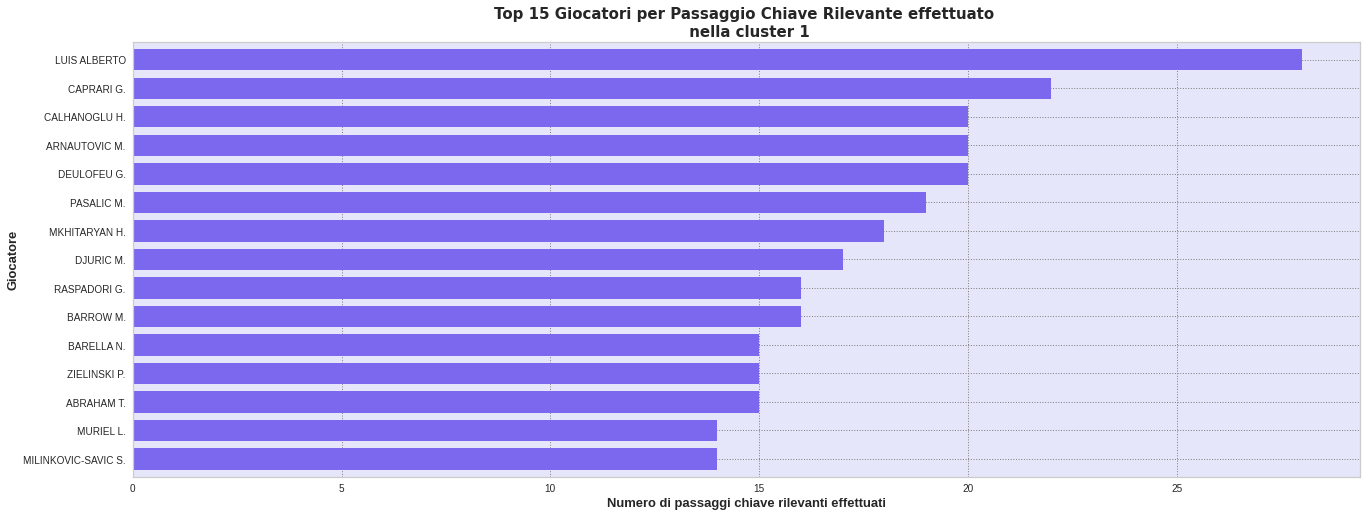

In [ ]:
#Focus Top 15 giocatori che effettuano il passaggio chiave Rilevante

dfpc_uno = dfpc_v[dfpc_v.cluster_1 == 1]

giocatore_1_custer = dfpc_uno.groupby(['Giocatori'])['Descrizione'].count().sort_values(ascending=False).head(15)

ax2 = giocatore_1_custer.plot(x='count',rot = 0, y='Giocatori', kind='barh', width=0.75, legend=False, stacked=True, color = 'mediumslateblue',  figsize=(22, 8))

ax2.invert_yaxis()
ax2.grid(axis='both', color='grey', ls=':')
ax2.set_facecolor('lavender')
ax2.set_ylabel(ylabel = 'Giocatore', weight='bold', size=13)
ax2.set_xlabel(xlabel = 'Numero di passaggi chiave rilevanti effettuati', weight='bold', size=13)

plt.title('Top 15 Giocatori per Passaggio Chiave Rilevante effettuato \n nella cluster 1',size=15, fontname="DejaVu Sans",fontweight="bold")

plt.show()

In [ ]:
#tabella
#print("Giocatori che hanno effettuato\nil passaggio chiave rilevante\n")
#giocatore_1_custer

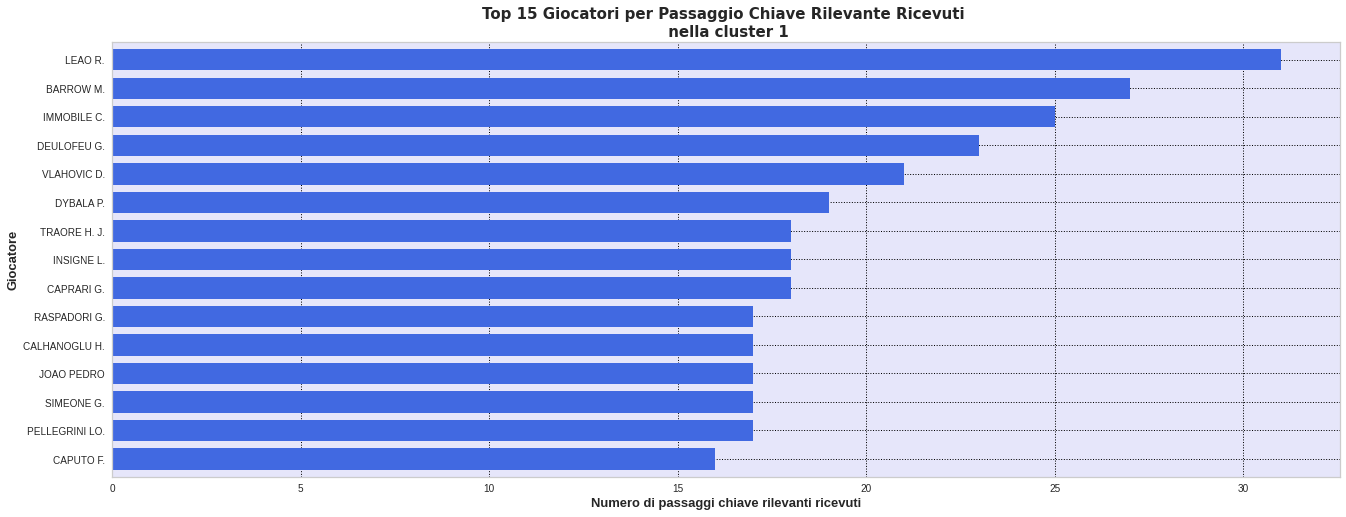

In [ ]:
#Focus Top 15 giocatori che ricevono il passaggio chiave Rilevante

dfpc_uno = dfpc_v[dfpc_v.cluster_1 == 1]

giocatore_ric_1_custer = dfpc_uno.groupby(['A Giocatore'])['Descrizione'].count().sort_values(ascending = False).head(15) #table dfpc_tre.groupby(['A Giocatore', 'Squadra', 'cluster_3'])['Descrizione'].count().sort_values(ascending=False).head(15)

ax3 = giocatore_ric_1_custer.plot(x='count',rot = 0, y= 'A Giocatore', kind='barh',width=0.75, legend=False, color = 'royalblue', figsize=(22, 8))

ax3.invert_yaxis()
ax3.grid(axis='both', color='black', ls=':')
ax3.set_facecolor('lavender')
ax3.set_ylabel(ylabel = 'Giocatore', weight='bold', size=13)
ax3.set_xlabel(xlabel = 'Numero di passaggi chiave rilevanti ricevuti', weight='bold', size=13)

plt.title('Top 15 Giocatori per Passaggio Chiave Rilevante Ricevuti \n nella cluster 1', fontsize = 15, fontname="DejaVu Sans",fontweight="bold")

plt.show()

In [ ]:
#tabella
#print("Giocatori che hanno ricevuto\nil passaggio chiave rilevante\n")
#giocatore_ric_1_custer

In [ ]:
#da notare che ci sono giocatori in entrambi gli hist: maggior qualità

In [ ]:
#Focus per Squadra

dfpc_w = pd.DataFrame()
dfpc_w['Passaggi_chiave_rilevanti_effettuati'] = dfpc_v.groupby('Squadra')['Descrizione'].count()
dfpc_w['Passaggi_rilevanti_effettuati a partita'] = round(dfpc_w['Passaggi_chiave_rilevanti_effettuati'] / 38, ndigits = 2)
dfpc_w = dfpc_w.reset_index().sort_values('Passaggi_chiave_rilevanti_effettuati', ascending = False)
dfpc_w

,Squadra,Passaggi_chiave_rilevanti_effettuati,Passaggi_rilevanti_effettuati a partita
6,INTER,440,11.58
10,NAPOLI,362,9.53
14,SASSUOLO,357,9.39
9,MILAN,355,9.34
0,ATALANTA,352,9.26
11,ROMA,337,8.87
7,JUVENTUS,335,8.82
4,FIORENTINA,317,8.34
17,UDINESE,316,8.32
1,BOLOGNA,299,7.87


In [ ]:
#Focus per Squadra per Cluster

#classifica sul cluster 1

dfpc_cl = pd.DataFrame()
dfpc_cl = dfpc_v.groupby('Squadra')[['Descrizione', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']].sum()
dfpc_cl = dfpc_cl.reset_index()
dfpc_cl.sort_values('cluster_1', ascending = False)

,Squadra,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
9,MILAN,92,117,34,70,42
6,INTER,144,112,32,107,45
11,ROMA,98,109,22,61,47
14,SASSUOLO,82,108,32,64,71
17,UDINESE,91,100,24,59,42
1,BOLOGNA,82,98,18,54,47
0,ATALANTA,105,93,25,79,50
8,LAZIO,84,92,21,52,49
10,NAPOLI,107,89,36,66,64
16,TORINO,80,78,19,72,41


In [ ]:
#Classifica Passaggi_chiave_rilevanti_effettuati

dfpc_w_pc = dfpc_w.merge(dfpc_cl, left_on = 'Squadra', right_on = 'Squadra')
dfpc_w_pc = dfpc_w_pc .merge(dfpc_t, left_on = 'Squadra', right_on = 'Squadra')
dfpc_w_pc.sort_values(['Passaggi_chiave_rilevanti_effettuati', 'Passaggi_chiave_tot_effettuati'], ascending = [False, False])

,Squadra,Passaggi_chiave_rilevanti_effettuati,Passaggi_rilevanti_effettuati a partita,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,Passaggi_chiave_tot_effettuati,Passaggi_chiave_tot_effettuati %,Passaggi_chiave_tot_effettuati a partita
0,INTER,440,11.58,144,112,32,107,45,1396,6.348918,36.74
1,NAPOLI,362,9.53,107,89,36,66,64,1487,6.762780,39.13
2,SASSUOLO,357,9.39,82,108,32,64,71,1397,6.353466,36.76
3,MILAN,355,9.34,92,117,34,70,42,1235,5.616700,32.50
4,ATALANTA,352,9.26,105,93,25,79,50,1036,4.711661,27.26
5,ROMA,337,8.87,98,109,22,61,47,1194,5.430235,31.42
6,JUVENTUS,335,8.82,94,74,34,76,57,1387,6.307986,36.50
7,FIORENTINA,317,8.34,89,75,21,90,42,1182,5.375659,31.11
8,UDINESE,316,8.32,91,100,24,59,42,955,4.343278,25.13
9,BOLOGNA,299,7.87,82,98,18,54,47,1141,5.189194,30.03


In [ ]:
tabella = dfpc_w_pc.sort_values(['Passaggi_chiave_rilevanti_effettuati', 'Passaggi_chiave_tot_effettuati'], ascending = [False, False])
tabella.to_csv('tabella.csv')

Dopo aver individuato la classifica delle Squadre di SerieA per Passaggi chiave Effettuati, vado a creare la metrica: Passaggi chiave rilevati "weighted".

Infatti, dato che il focus è individuare quali Squadre compiono questa tipologia di passaggio in una zona del campo pericolosa, vado ad assegnare un determinato peso per ogni cluster, il quale peso è determinato proporzionalmente ai passaggi rilevanti effettuati sul totale di essi al fine di rispettare un analisi oggettiva

passaggi chiave rilevanti weighted =
$\displaystyle\frac{\sum_{squadre=1}^\text{20} \text{Passaggi Chiave Rilevanti} \text{ * } (1 + w_{cluster=1}^5)}{\sum_{squadre=1}^\text{20} \text{Passaggi Chiave Effettuati}}$

In [ ]:
#prova, dati dalla tendenza
art.pesi

0    0.289060
1    0.274507
2    0.210606
3    0.147374
4    0.078454
Name: pesi, dtype: float64

In [ ]:
dfpc_w_pc['Passaggi_chiave_rilevanti_weighted_pesi'] = round(((dfpc_w_pc.cluster_0) * (1 + 0.289)) + ((dfpc_w_pc.cluster_1) * (1 + 0.274)) + ((dfpc_w_pc.cluster_2) * (1 + 0.21)) + ((dfpc_w_pc.cluster_3) * (1 + 0.147)) + ((dfpc_w_pc.cluster_4) * (1 + 0.078)) / (dfpc_w_pc['Passaggi_chiave_tot_effettuati']), ndigits = 2)
dfpc_w_pc.sort_values('Passaggi_chiave_rilevanti_weighted_pesi', ascending = False)
dfpc_w_pc[['Squadra', 'Passaggi_chiave_rilevanti_effettuati', 'Passaggi_chiave_rilevanti_weighted_pesi', 'Passaggi_rilevanti_effettuati a partita', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'Passaggi_chiave_tot_effettuati', 'Passaggi_chiave_tot_effettuati a partita']].sort_values('Passaggi_chiave_rilevanti_weighted_pesi', ascending = False)

,Squadra,Passaggi_chiave_rilevanti_effettuati,Passaggi_chiave_rilevanti_weighted_pesi,Passaggi_rilevanti_effettuati a partita,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,Passaggi_chiave_tot_effettuati,Passaggi_chiave_tot_effettuati a partita
0,INTER,440,489.79,11.58,144,112,32,107,45,1396,36.74
3,MILAN,355,389.11,9.34,92,117,34,70,42,1235,32.50
4,ATALANTA,352,374.74,9.26,105,93,25,79,50,1036,27.26
1,NAPOLI,362,370.62,9.53,107,89,36,66,64,1487,39.13
5,ROMA,337,361.82,8.87,98,109,22,61,47,1194,31.42
2,SASSUOLO,357,355.47,9.39,82,108,32,64,71,1397,36.76
6,JUVENTUS,335,343.80,8.82,94,74,34,76,57,1387,36.50
8,UDINESE,316,341.46,8.32,91,100,24,59,42,955,25.13
7,FIORENTINA,317,338.95,8.34,89,75,21,90,42,1182,31.11
9,BOLOGNA,299,314.31,7.87,82,98,18,54,47,1141,30.03


In [ ]:
dfpc_w_pc[['Squadra','Passaggi_chiave_rilevanti_weighted_pesi']].sort_values('Passaggi_chiave_rilevanti_weighted_pesi', ascending = False)# 'Passaggi_chiave_rilevanti_weighted_pesi

,Squadra,Passaggi_chiave_rilevanti_weighted_pesi
0,INTER,489.79
3,MILAN,389.11
4,ATALANTA,374.74
1,NAPOLI,370.62
5,ROMA,361.82
2,SASSUOLO,355.47
6,JUVENTUS,343.80
8,UDINESE,341.46
7,FIORENTINA,338.95
9,BOLOGNA,314.31


In [ ]:
media_serieA = dfpc_w_pc['Passaggi_chiave_rilevanti_weighted_pesi'].mean()
media_serieA_cluster1 = dfpc_w_pc.cluster_1.mean()
print(media_serieA)
print(media_serieA_cluster1)

316.522
82.05


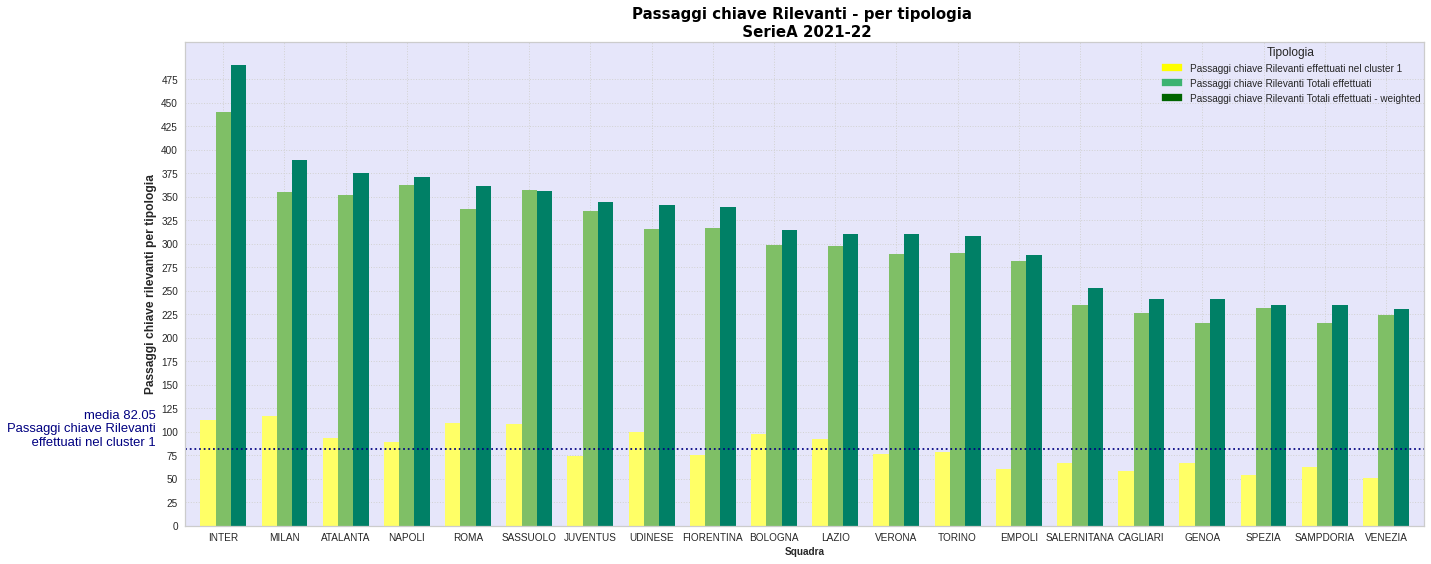

In [ ]:
per_plot1 = dfpc_w_pc[['Squadra','cluster_1','Passaggi_chiave_rilevanti_effettuati', 'Passaggi_chiave_rilevanti_weighted_pesi']].sort_values('Passaggi_chiave_rilevanti_weighted_pesi', ascending = False)
ax = per_plot1.plot(kind='bar', rot=0, xlabel='Squadra', ylabel='Passaggi chiave rilevanti per tipologia', title='Passaggi chiave effettuati per tipologia \n SerieA 2021-22', width=0.75,  figsize=(20, 8), cmap='summer_r')
ax.set_xticklabels(per_plot1.Squadra);

ax.set_axisbelow(True)
ax.grid(axis='both', color='lightgrey', ls=':')
ax.set_facecolor('lavender')
ax.set_yticks(range(0, 500, 25))
ax.set_ylabel(ylabel = 'Passaggi chiave rilevanti per tipologia', weight='bold', size=12)
ax.set_xlabel(xlabel = 'Squadra', weight='bold', size=10)

ax.hlines(media_serieA_cluster1, -1, xmax = media_serieA_cluster1, color='navy', ls = ':')
ax.text(-1.1, media_serieA_cluster1, f'media {media_serieA_cluster1:.2f}\nPassaggi chiave Rilevanti\n effettuati nel cluster 1',
        ha='right', va='bottom', color='navy',  fontsize = 13)

plt.title('Passaggi chiave Rilevanti - per tipologia \n SerieA 2021-22', fontsize = 15, loc='center', color='black', fontname="DejaVu Sans",fontweight="bold")

yellow_p = mpatches.Patch(color='yellow', label='Passaggi chiave Rilevanti effettuati nel cluster 1')
mediumseagreen_p = mpatches.Patch(color='mediumseagreen', label='Passaggi chiave Rilevanti Totali effettuati')
forestgreen_p = mpatches.Patch(color='darkgreen', label='Passaggi chiave Rilevanti Totali effettuati - weighted')

plt.legend(title = "Tipologia", loc= 'upper right', handles=[yellow_p, mediumseagreen_p, forestgreen_p], bbox_to_anchor=(1, 1), borderaxespad=0, fontsize = 10)

plt.tight_layout()
#plt.show()
plt.savefig("tipologia.png")

In [ ]:
#Visualizzare che tipo di Tags è stato più usato

dfpc_v_cl2 = dfpc_v[(dfpc_v.cluster_0 == 1) | (dfpc_v.cluster_1 == 1) | (dfpc_v.cluster_2 == 1) | (dfpc_v.cluster_3 == 1) | (dfpc_v.cluster_4 == 1)]

table_count1 = pd.DataFrame()
table_count1['tipo_tags'] = dfpc_v_cl2.groupby([ 'Tags', 'cluster_str'])['cluster'].count()
table_count1 = table_count1.reset_index()

table_count1[(table_count1.cluster_str == '1')].sort_values("tipo_tags", ascending = False)

,Tags,cluster_str,tipo_tags
24,"Non Vincente, Assist",1,1175
29,"Verticalizzazione, Non Vincente, Assist",1,243
48,"Vincente, Assist",1,117
35,"Verticalizzazione, Vincente, Assist",1,53
40,"Verticalizzazione, Vincente, Third Pass",1,21
1,"Assist, Non Vincente",1,12
8,"Cambio Gioco, Non Vincente, Assist",1,12
16,"Cambio Gioco, Vincente, Third Pass",1,3
5,"Assist, Vincente",1,2
14,"Cambio Gioco, Vincente, Assist",1,2


Grazie alla metrica, si è in grado di individuare le 4 Squadre che sono state più attive secondo i Passaggi Chiave Rilevanti effettuati:


1.   INTER
2.   MILAN
3.   ATALANTA
4.   NAPOLI

In [ ]:
dfpc_v_inter = dfpc_v[(dfpc_v.Tags.isin(rilevante)) & (dfpc_v.Squadra == 'INTER')]
dfpc_v_inter.Tags.unique()

array(['Non Vincente, Assist', 'Verticalizzazione, Non Vincente, Assist',
       'Vincente, Assist', 'Assist, Non Vincente', 'Assist, Vincente',
       'Verticalizzazione, Vincente, Assist',
       'Verticalizzazione, Vincente, Third Pass',
       'Cambio Gioco, Non Vincente, Assist',
       'Verticalizzazione, Vincente, Third Pass per Se Stesso',
       'Cambio Gioco, Vincente, Third Pass'], dtype=object)

In [ ]:
dfpc_v_milan = dfpc_v[(dfpc_v.Tags.isin(rilevante)) & (dfpc_v.Squadra == 'MILAN')]
dfpc_v_milan.Tags.unique()

array(['Non Vincente, Assist', 'Verticalizzazione, Non Vincente, Assist',
       'Assist, Vincente', 'Vincente, Assist',
       'Verticalizzazione, Vincente, Third Pass', 'Assist, Non Vincente',
       'Verticalizzazione, Vincente, Assist',
       'Cambio Gioco, Non Vincente, Assist',
       'Cambio Gioco, Vincente, Third Pass'], dtype=object)

In [ ]:
dfpc_v_atalanta = dfpc_v[(dfpc_v.Tags.isin(rilevante)) & (dfpc_v.Squadra == 'ATALANTA')]
dfpc_v_atalanta.Tags.unique()

array(['Non Vincente, Assist', 'Assist, Non Vincente', 'Vincente, Assist',
       'Verticalizzazione, Non Vincente, Assist',
       'Verticalizzazione, Vincente, Assist', 'Assist, Vincente',
       'Verticalizzazione, Vincente, Third Pass',
       'Cambio Gioco, Non Vincente, Assist'], dtype=object)

In [ ]:
dfpc_v_napoli = dfpc_v[(dfpc_v.Tags.isin(rilevante)) & (dfpc_v.Squadra == 'NAPOLI')]
dfpc_v_napoli.Tags.unique()

array(['Non Vincente, Assist', 'Verticalizzazione, Non Vincente, Assist',
       'Vincente, Assist', 'Verticalizzazione, Vincente, Assist',
       'Assist, Vincente', 'Assist, Non Vincente',
       'Verticalizzazione, Vincente, Third Pass',
       'Cross, Vincente, Third Pass',
       'Cambio Gioco, Non Vincente, Assist',
       'Cambio Gioco, Vincente, Third Pass'], dtype=object)

In [ ]:
df_sq = [dfpc_v_inter, dfpc_v_milan, dfpc_v_atalanta, dfpc_v_napoli]

In [ ]:
for df in df_sq:
  dfZ = df.groupby(['Squadra', 'Tags'])['Tags'].count()
  print(dfZ.sort_values())

Squadra  Tags                                                 
INTER    Cambio Gioco, Vincente, Third Pass                         1
         Verticalizzazione, Vincente, Third Pass per Se Stesso      2
         Cambio Gioco, Non Vincente, Assist                         7
         Verticalizzazione, Vincente, Assist                        8
         Verticalizzazione, Vincente, Third Pass                   10
         Assist, Vincente                                          21
         Vincente, Assist                                          32
         Verticalizzazione, Non Vincente, Assist                   38
         Assist, Non Vincente                                      81
         Non Vincente, Assist                                     240
Name: Tags, dtype: int64
Squadra  Tags                                   
MILAN    Cambio Gioco, Vincente, Third Pass           1
         Cambio Gioco, Non Vincente, Assist           3
         Verticalizzazione, Vincente, Assist       

In [ ]:
dfpc_v.clusters

43        3
171       1
181       0
351       1
384       0
         ..
975999    0
976201    1
976267    1
976274    4
976331    1
Name: clusters, Length: 5978, dtype: int32

Visualizzo come le cluster individuate precedentemente si distribuiscono nel campo per ciascuna delle 4 Squadre individuate, al fine di cogliere le rispettive caratteristiche attraverso

*   Plot di distribuzione delle clusters
*   Plot dei Passaggi chiavi rilevanti nelle 20 zone di campo, risaltando l'uso degli half spaces
*   Flow map dei Passaggi chiavi rilevanti - intensità e lunghezza media nelle 20 zone di campo

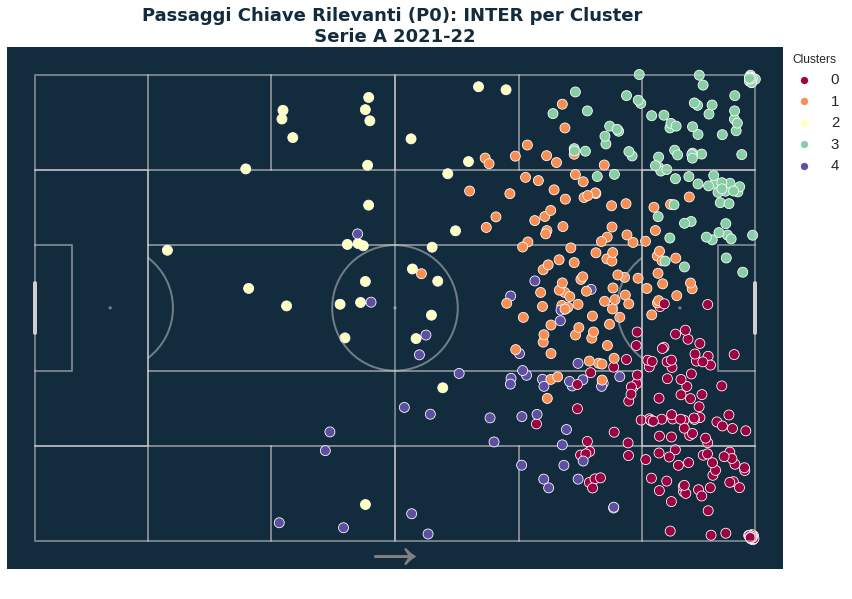

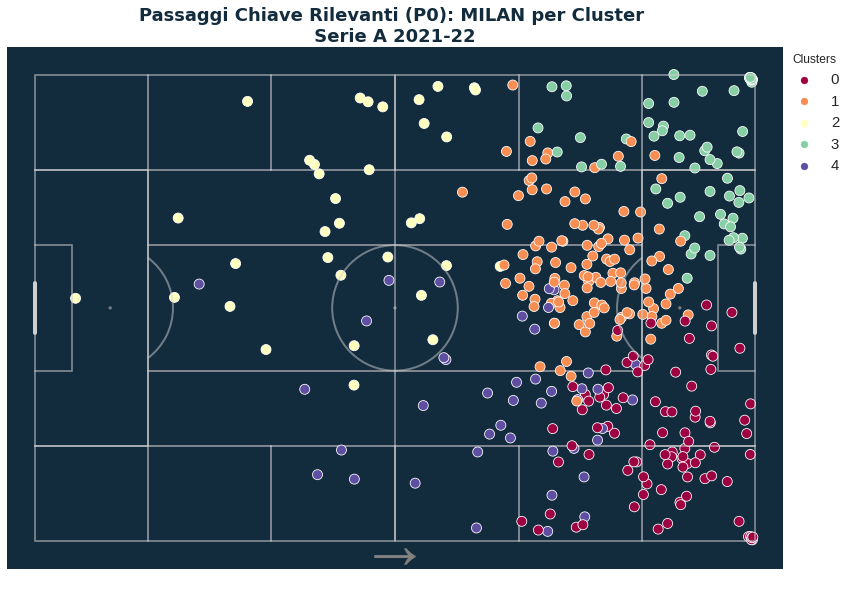

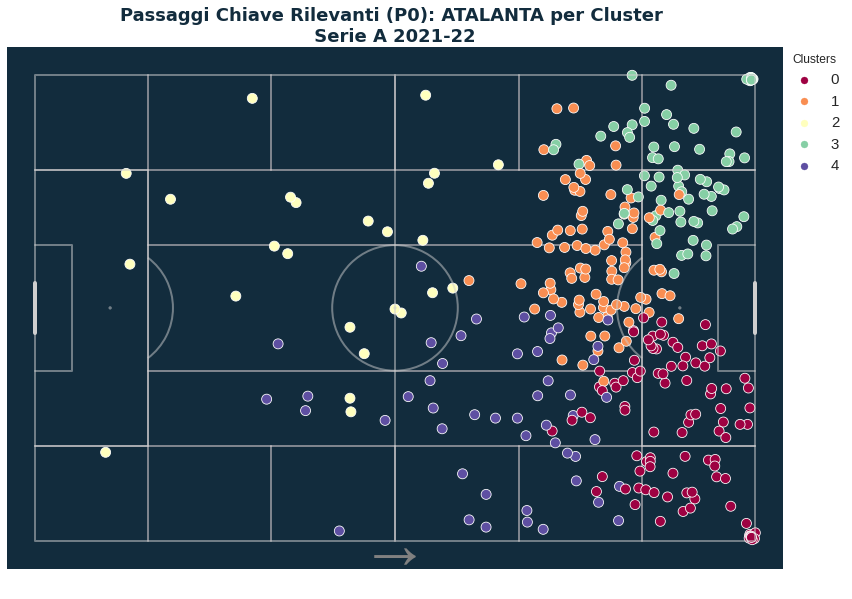

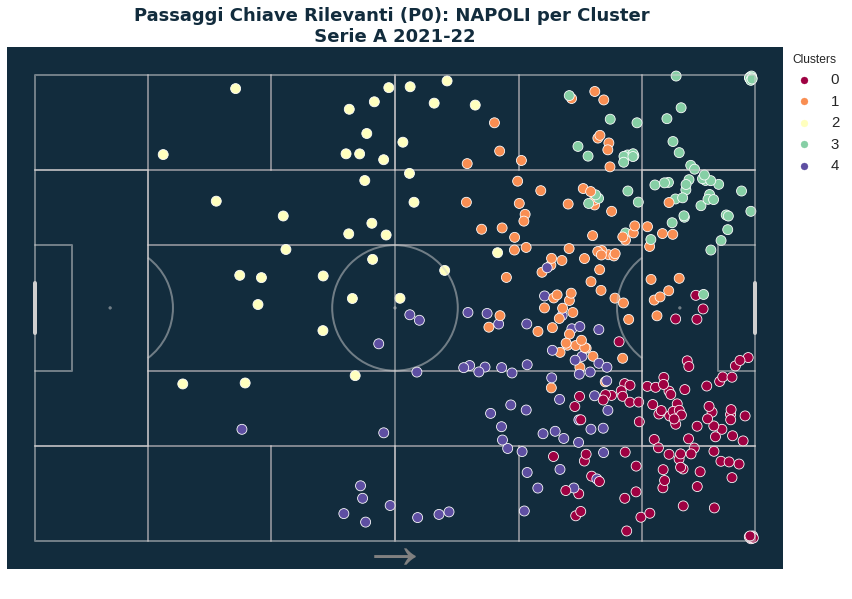

In [ ]:
sns.color_palette("Spectral", as_cmap=True)

for df in df_sq:

  pitch = Pitch(positional=True, pitch_type = 'uefa', pitch_color = '#122c3d', line_color = '#cfcfcf', line_zorder = 2, line_alpha=0.5)  #122c3d, pitch color

  f, ax = pitch.draw(figsize=(12,12))

  ax.invert_yaxis()

  ax.patch.set_facecolor('#122c3d')

  sns.scatterplot(data = df, x = df['P0 norm x'], y = df['P0 norm y'], palette = 'Spectral', hue = 'clusters',hue_order = np.arange(0,5).astype(str), s = 100, edgecolor='white', ax = ax)

  plt.legend(title = 'Clusters', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 15)

  plt.text(0.5, 0.019, "→", \
          horizontalalignment='center', verticalalignment='center', color='grey', size='70', \
              transform=ax.transAxes)

  name_sq = df['Squadra'].values
  plt.title(f'Passaggi Chiave Rilevanti (P0): { name_sq[1] } per Cluster \n Serie A 2021-22 ', fontsize=18, loc='center', color='#122c3d', fontname="DejaVu Sans",fontweight="bold")

  plt.tight_layout()

  plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

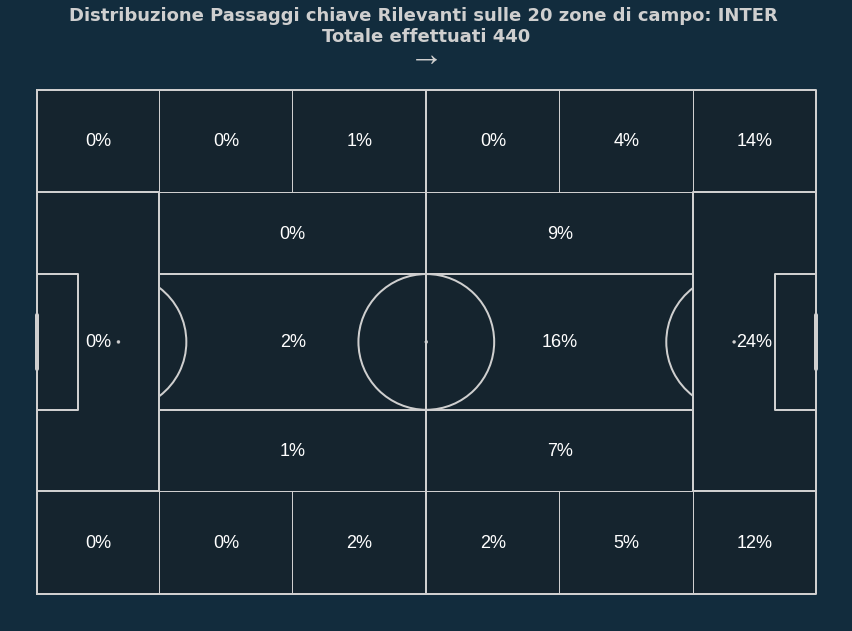

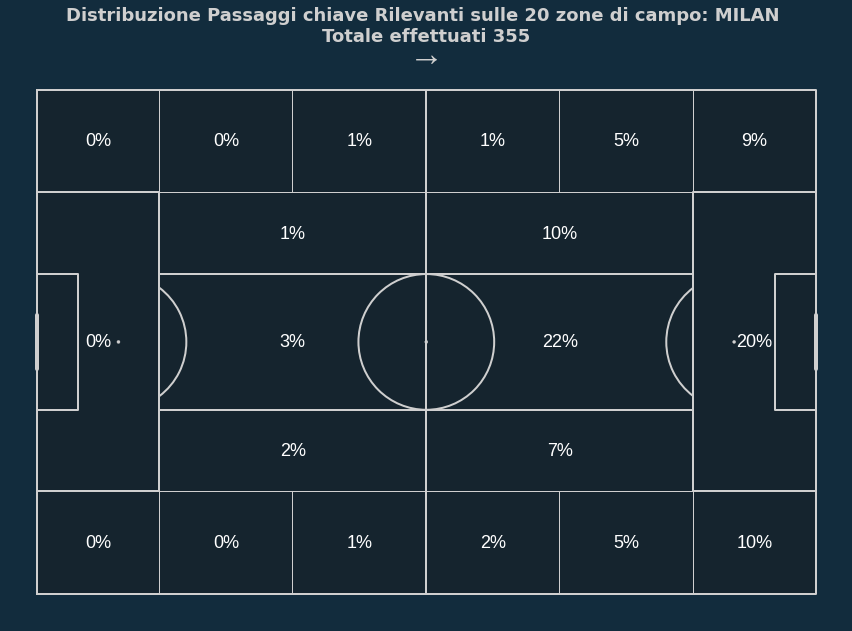

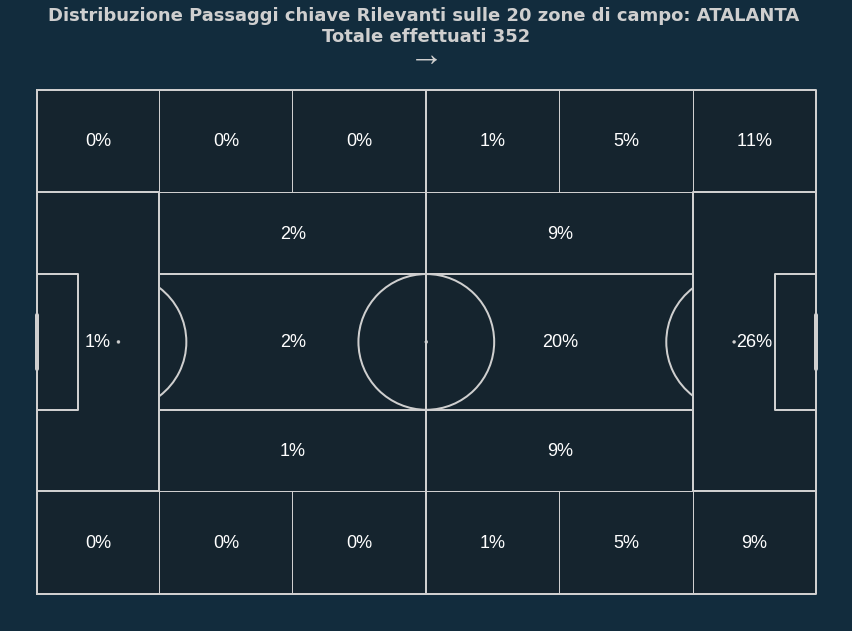

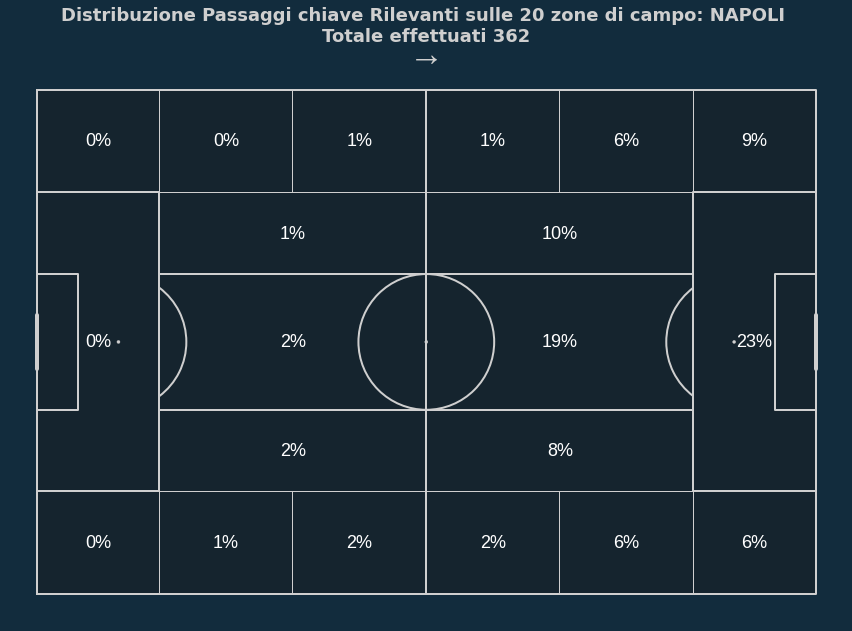

In [ ]:
for df in df_sq:
  pitch = Pitch(pitch_type='uefa', line_zorder=2,line_color = '#cfcfcf', pitch_color='#122c3d')

  fig, axs = pitch.grid(endnote_height=0., endnote_space=0,
                        title_height=0.02, title_space=0.,
                        axis=False,
                        grid_height=0.87)

  ax.invert_yaxis()

  fig.set_facecolor('#122c3d')

  table_count = df.Descrizione.count().sum() #da aggiungere 'Tags', cluster_str

  bin_statistic = pitch.bin_statistic_positional(df['P0 norm x'], df['P0 norm y'], statistic='count', positional='full', normalize=True)

  pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], cmap=pearl_earring_cmap, edgecolors='#cfcfcf', vmin = table_count.min().min(), vmax = table_count.max().max())

  labels = pitch.label_heatmap(bin_statistic , color='white', fontsize=18,
                              ax=axs['pitch'], ha='center', va='center',
                              str_format='{:.0%}')

  plt.text(0.5, 0.019, "→", horizontalalignment='center', verticalalignment='center', color='#cfcfcf', size='35')

  name_sq = df['Squadra'].values

  plt.title(f'Distribuzione Passaggi chiave Rilevanti sulle 20 zone di campo: { name_sq[1]} \nTotale effettuati {df.Descrizione.count()}', color='#cfcfcf', fontsize=18, loc='center', fontname="DejaVu Sans",fontweight="bold")

  plt.tight_layout()

  plt.show()

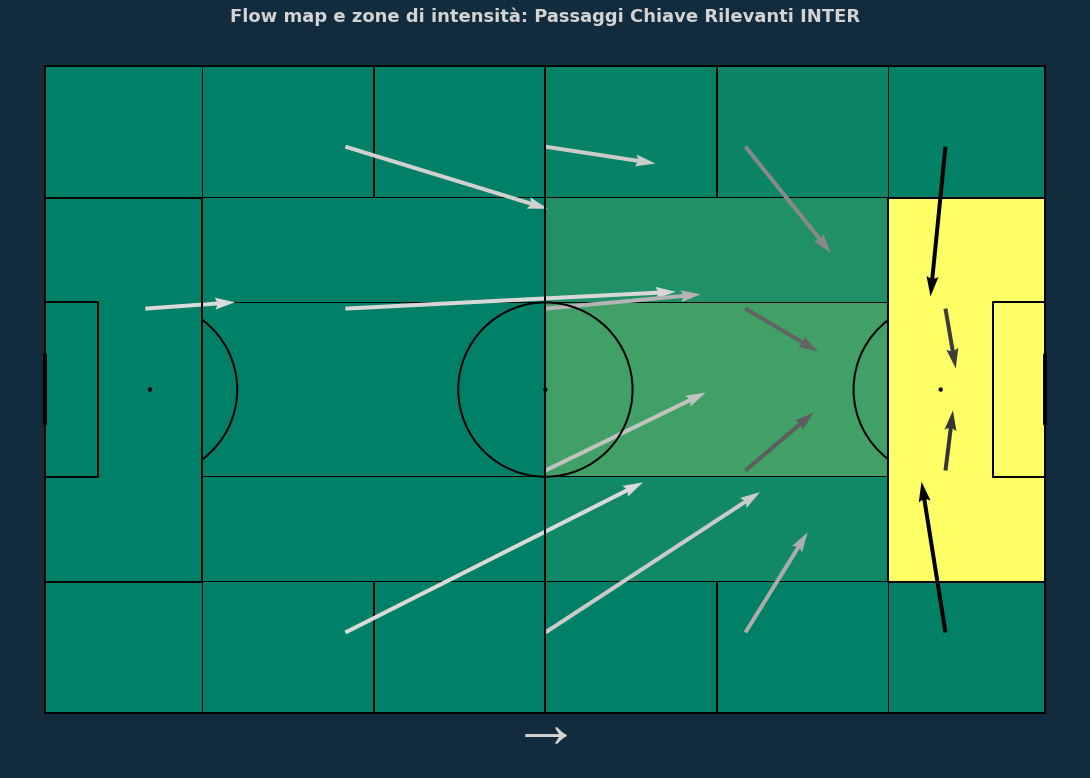

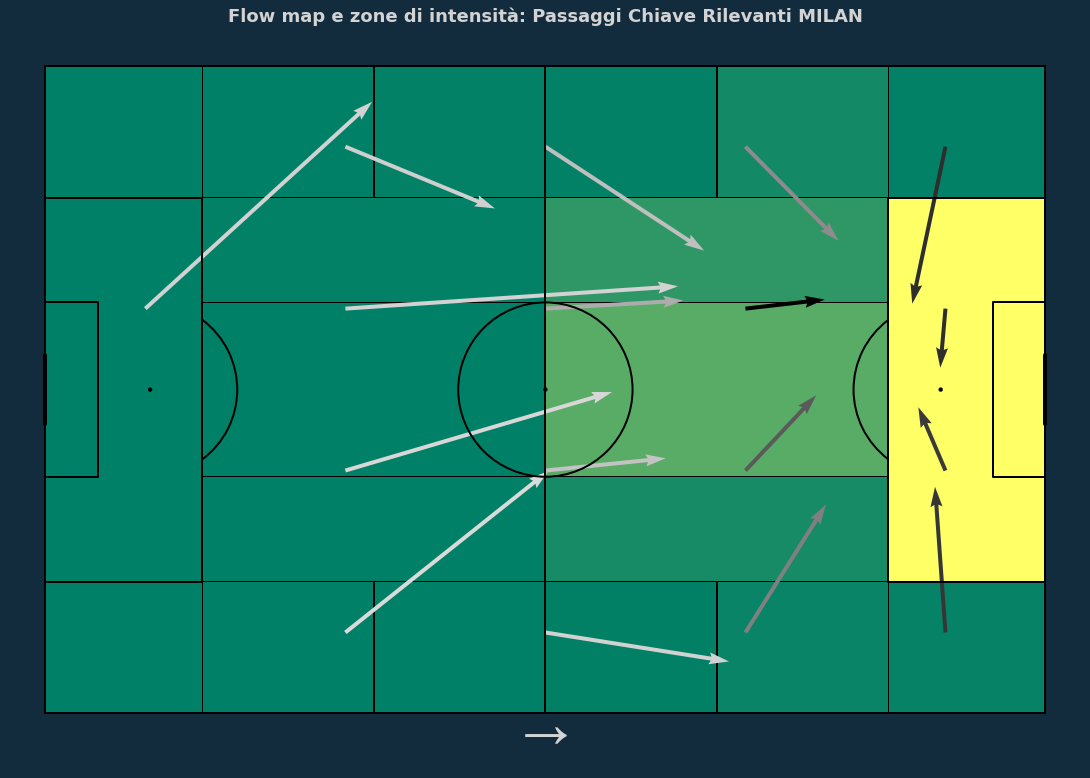

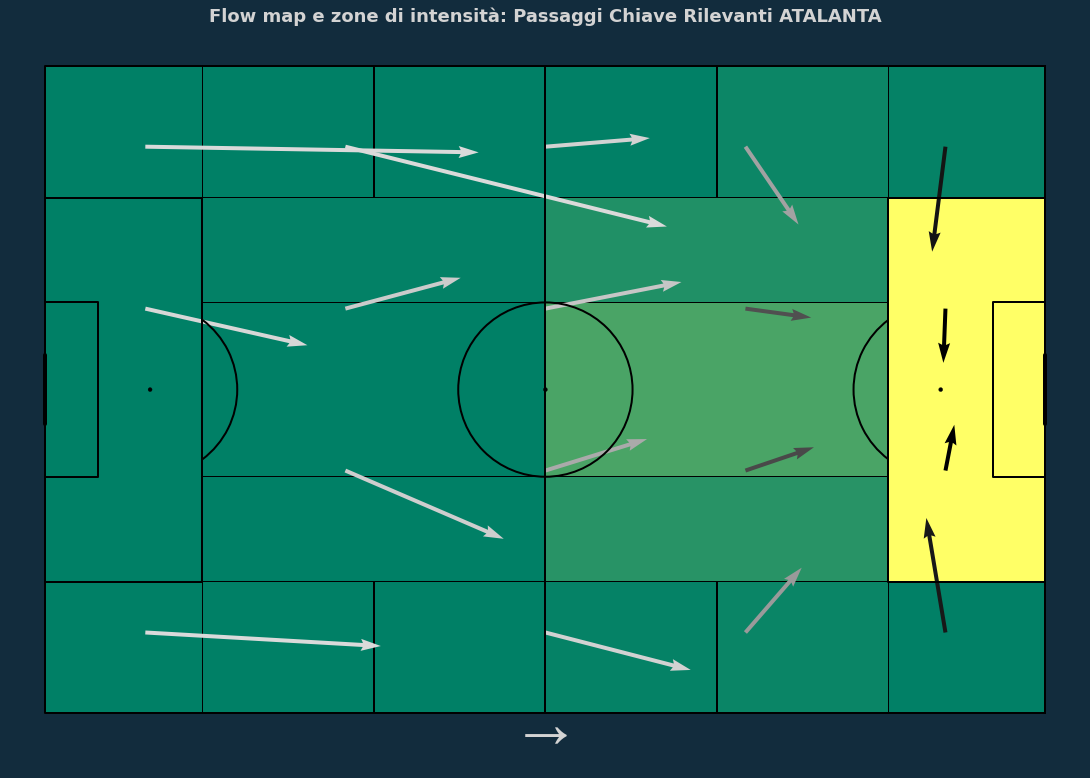

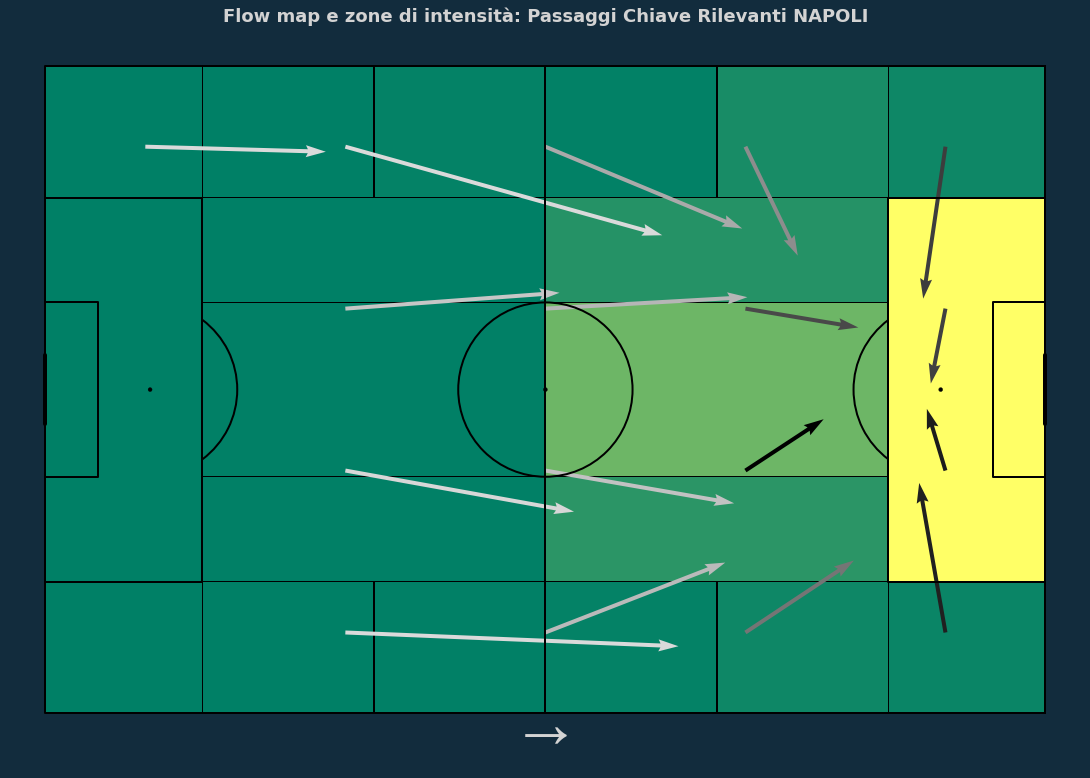

In [ ]:
for df in df_sq:
  pitch = Pitch(pitch_type='uefa',  line_zorder=10, line_color='black', pitch_color='#122c3d')

  #bins = (6, 5)

  fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
  ax.invert_yaxis()
  fig.set_facecolor('#122c3d')
  # plot the heatmap - darker colors = more passes originating from that square
  bs_heatmap = pitch.bin_statistic_positional(df['P1 norm x'], df['P1 norm y'], statistic='count')

  hm = pitch.heatmap_positional(bs_heatmap,edgecolors='black', ax=ax, cmap= 'summer')

  # plot the pass flow map with a custom color map and the arrows scaled by the average pass length
  # the longer the arrow the greater the average pass length in the cell
  grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
  fm = pitch.flow(df['P0 norm x'], df['P0 norm y'],  df['P1 norm x'], df['P1 norm y'], cmap= grey,
                  arrow_type='scale', arrow_length=35, ax=ax) #bins=bins,

  #ax_title = ax.set_title(f'{df.Squadra.unique()} pass flow map',pad=-20, color='white', fontsize=18, loc='center')

  name_sq = df['Squadra'].values
  plt.title(f'Flow map e zone di intensità: Passaggi Chiave Rilevanti {name_sq[1]}', color='lightgray', fontsize=18, loc='center', fontname="DejaVu Sans",fontweight="bold")

  plt.text(0.5, 0.019, "→", \
          horizontalalignment='center', verticalalignment='center', color='lightgray', size='70', \
              transform=ax.transAxes)

  plt.tight_layout()
  plt.show()

EXTRA: Analisi di un pool di partite, prendendo il Milan (Vincitrice dello scorso campionato) come sample.

Analizzo quindi 3 partite decisive per il Milan per affermarsi in testa al campionato:


*   35a giornata: MILAN - FIORENTINA (1-0)
*   36a giornata: VERONA - MILAN (1-3)
*   37a giornata: MILAN - ATALANTA (2-0)

In [ ]:
dfpc_v_milan.Partita.unique()

array(['SASSUOLO-MILAN', 'MILAN-ATALANTA', 'VERONA-MILAN',
       'MILAN-FIORENTINA', 'LAZIO-MILAN', 'MILAN-GENOA', 'TORINO-MILAN',
       'MILAN-BOLOGNA', 'CAGLIARI-MILAN', 'MILAN-EMPOLI', 'NAPOLI-MILAN',
       'MILAN-UDINESE', 'SALERNITANA-MILAN', 'MILAN-SAMPDORIA',
       'INTER-MILAN', 'MILAN-JUVENTUS', 'MILAN-SPEZIA', 'VENEZIA-MILAN',
       'MILAN-ROMA', 'EMPOLI-MILAN', 'MILAN-NAPOLI', 'UDINESE-MILAN',
       'MILAN-SALERNITANA', 'GENOA-MILAN', 'MILAN-SASSUOLO',
       'FIORENTINA-MILAN', 'MILAN-INTER', 'ROMA-MILAN', 'MILAN-TORINO',
       'BOLOGNA-MILAN', 'MILAN-VERONA', 'ATALANTA-MILAN', 'SPEZIA-MILAN',
       'MILAN-VENEZIA', 'JUVENTUS-MILAN', 'MILAN-LAZIO', 'MILAN-CAGLIARI',
       'SAMPDORIA-MILAN'], dtype=object)

In [ ]:
dfpc_v_milan.Tags.unique()

array(['Non Vincente, Assist', 'Verticalizzazione, Non Vincente, Assist',
       'Assist, Vincente', 'Vincente, Assist',
       'Verticalizzazione, Vincente, Third Pass', 'Assist, Non Vincente',
       'Verticalizzazione, Vincente, Assist',
       'Cambio Gioco, Non Vincente, Assist',
       'Cambio Gioco, Vincente, Third Pass'], dtype=object)

In [ ]:
partite_milan = ['MILAN-ATALANTA','VERONA-MILAN','MILAN-FIORENTINA']

In [ ]:
dfpc_v_milan_extra =  dfpc_v_milan[dfpc_v_milan.Partita.isin(partite_milan)]

In [ ]:
rilevante = ['Assist, Vincente', 'Vincente, Assist',
       'Verticalizzazione, Vincente, Third Pass',
       'Verticalizzazione, Vincente, Assist',
       'Cambio Gioco, Vincente, Third Pass']

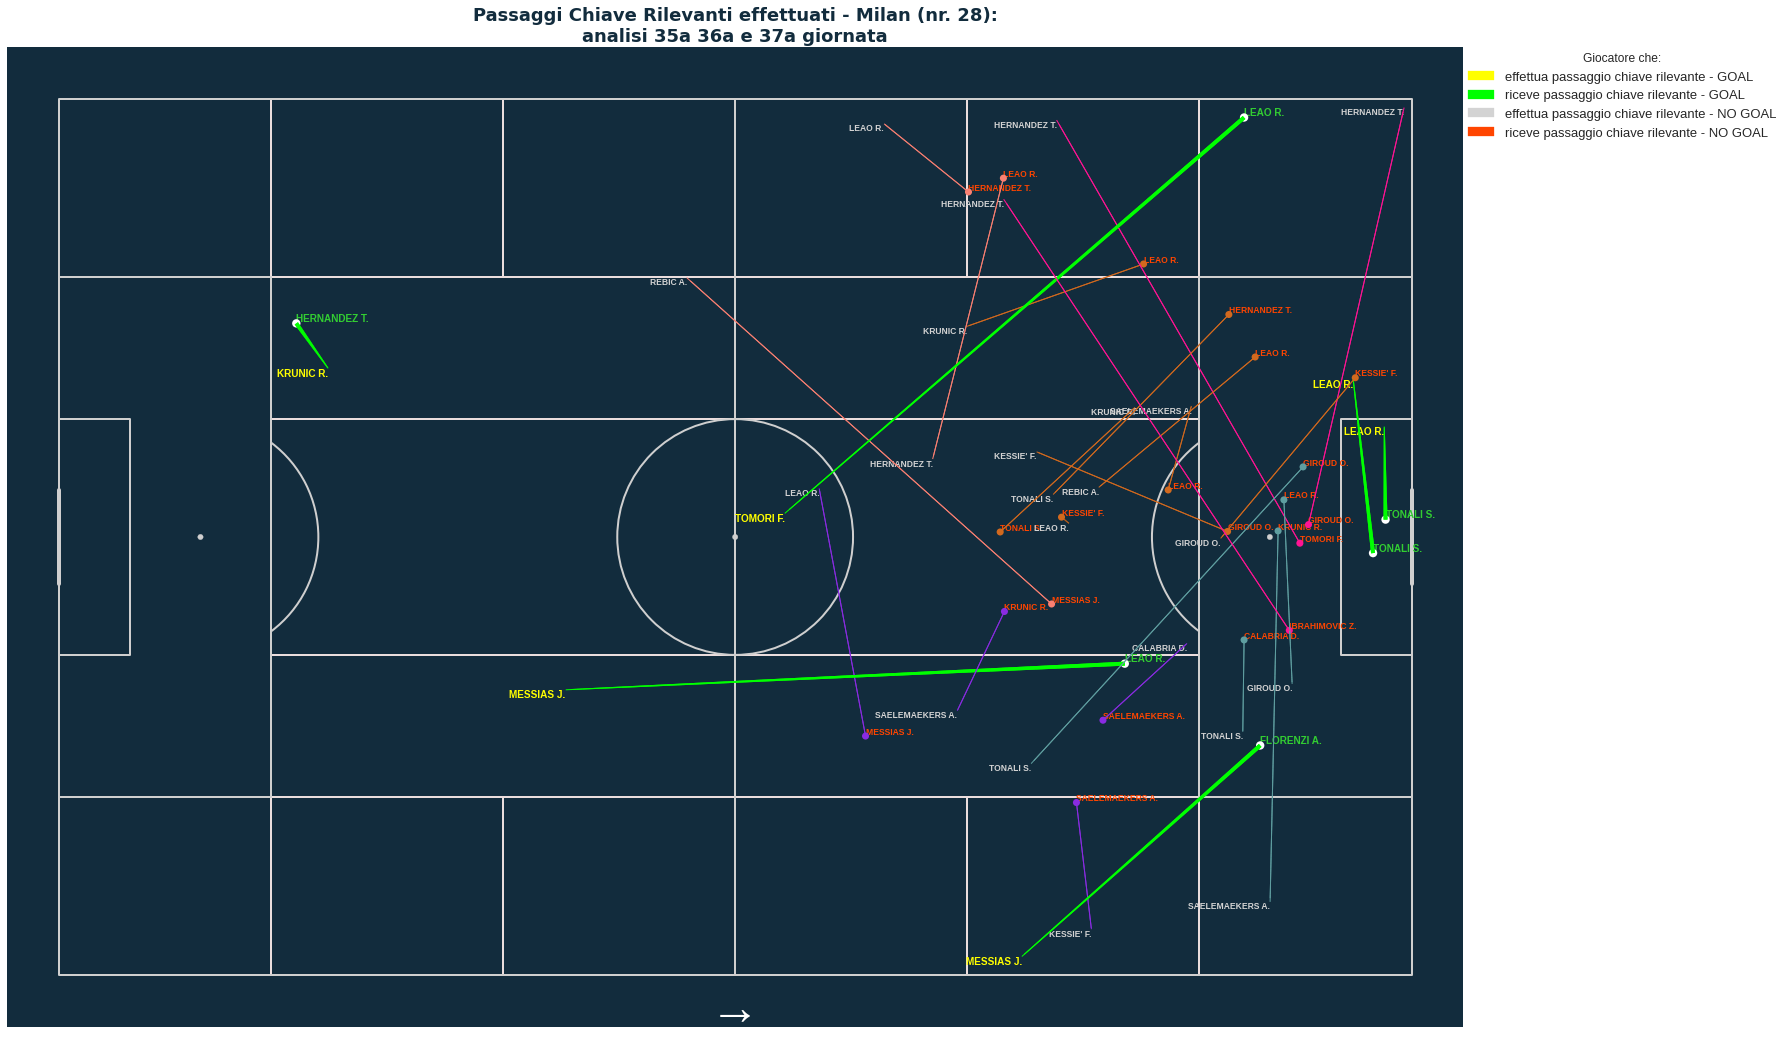

In [ ]:
#questa si può fare separato su un dataset degli ultimi 5 match

dfpc_v_milan_extra.reset_index(inplace = True,drop = True)

pitch = Pitch(positional=True, pitch_type = 'uefa', pitch_color = '#122c3d', line_color = '#cfcfcf', line_zorder = 1)  #122c3d, pitch color

f, ax = pitch.draw(figsize=(25,45))

ax.invert_yaxis()

ax.patch.set_facecolor('#122c3d')

n_c = [0, 1, 2, 3, 4] #numero di cluster

set_color_cluster = ['cadetblue', 'chocolate', 'salmon', 'deeppink', 'blueviolet']

for i in range(0, len(dfpc_v_milan_extra['cluster'])):

  if  ( dfpc_v_milan_extra['Tags'][i] in rilevante) & (dfpc_v_milan_extra['cluster'][i] in n_c):      #'' in dfpc_v_milan_extra['Tags'][i] & (dfpc_v_milan_extra['cluster'][i] in n_c)
      pitch.lines(xstart = dfpc_v_milan_extra['P0 norm x'][i], ystart= dfpc_v_milan_extra['P0 norm y'][i],xend = dfpc_v_milan_extra['P1 norm x'][i], yend = dfpc_v_milan_extra['P1 norm y'][i], color = 'lime', comet = True, lw = 4, zorder = 10, label = 'Assist', ax=ax)
      pitch.annotate(dfpc_v_milan_extra['Giocatori'][i], xy=(dfpc_v_milan_extra['P0 norm x'][i], dfpc_v_milan_extra['P0 norm y'][i]), c='yellow', va='top', ha='right', size=10, weight='bold', ax=ax)
      pitch.annotate(dfpc_v_milan_extra['A Giocatore'][i], xy=(dfpc_v_milan_extra['P1 norm x'][i], dfpc_v_milan_extra['P1 norm y'][i]), c='limegreen', va='bottom', ha='left', size=10, weight='bold', ax=ax)
      pitch.scatter(x = dfpc_v_milan_extra['P1 norm x'][i], y = dfpc_v_milan_extra['P1 norm y'][i], s = 70, color = 'white', edgecolor = 'none', zorder = 5, ax = ax)

  elif dfpc_v_milan_extra['cluster'][i] in n_c:
      pitch.lines(xstart = dfpc_v_milan_extra['P0 norm x'][i], ystart= dfpc_v_milan_extra['P0 norm y'][i],xend = dfpc_v_milan_extra['P1 norm x'][i], yend = dfpc_v_milan_extra['P1 norm y'][i], color = set_color_cluster[dfpc_v_milan_extra['cluster'][i]],comet = True, lw = 1, zorder = 10, ax=ax)
      pitch.annotate(dfpc_v_milan_extra['Giocatori'][i], xy=(dfpc_v_milan_extra['P0 norm x'][i], dfpc_v_milan_extra['P0 norm y'][i]), c='lightgrey', va='top', ha='right', size=8.5, weight='bold', ax=ax)
      pitch.annotate(dfpc_v_milan_extra['A Giocatore'][i], xy=(dfpc_v_milan_extra['P1 norm x'][i], dfpc_v_milan_extra['P1 norm y'][i]), c='orangered', va='bottom', ha='left', size=8.5, weight='bold', ax=ax)
      pitch.scatter(x = dfpc_v_milan_extra['P1 norm x'][i], y = dfpc_v_milan_extra['P1 norm y'][i], s = 50, color = set_color_cluster[dfpc_v_milan_extra['cluster'][i]], edgecolor = 'none', zorder = 5, ax = ax)

plt.text(0.5, 0.01, "→", \
          horizontalalignment='center', verticalalignment='center', color='white', size='50', \
              transform=ax.transAxes)

yellow_patch = mpatches.Patch(color='yellow', label='effettua passaggio chiave rilevante - GOAL')
lime_patch = mpatches.Patch(color='lime', label='riceve passaggio chiave rilevante - GOAL')
lightgrey_patch = mpatches.Patch(color='lightgrey', label='effettua passaggio chiave rilevante - NO GOAL')
orangered_patch = mpatches.Patch(color='orangered', label='riceve passaggio chiave rilevante - NO GOAL')

plt.legend(title = "Giocatore che:", handles=[yellow_patch, lime_patch, lightgrey_patch, orangered_patch], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 13)

plt.title(f'Passaggi Chiave Rilevanti effettuati - Milan (nr. {dfpc_v_milan_extra.Descrizione.count()}):\nanalisi 35a 36a e 37a giornata', color='#122c3d', fontsize=18, loc='center', fontname="DejaVu Sans",fontweight="bold")
plt.show()
#plt.savefig('extra.png')

In [ ]:
print('Giocatori e numero di passaggio chiave rilevante effettuato:')
dfpc_v_milan_extra.groupby(['Giocatori'])['Descrizione'].count().sort_values(ascending=False).head(15)

Giocatori e numero di passaggio chiave rilevante effettuato:


Giocatori
LEAO R.            5
HERNANDEZ T.       4
KRUNIC R.          3
SAELEMAEKERS A.    3
TONALI S.          3
GIROUD O.          2
KESSIE' F.         2
MESSIAS J.         2
REBIC A.           2
CALABRIA D.        1
TOMORI F.          1
Name: Descrizione, dtype: int64

In [ ]:
print('Giocatori e numero di passaggio chiave rilevante ricevuto:')
dfpc_v_milan_extra.groupby(['A Giocatore'])['Descrizione'].count().sort_values(ascending=False).head(15)

Giocatori e numero di passaggio chiave rilevante ricevuto:


A Giocatore
LEAO R.            7
GIROUD O.          3
HERNANDEZ T.       3
TONALI S.          3
KESSIE' F.         2
KRUNIC R.          2
MESSIAS J.         2
SAELEMAEKERS A.    2
CALABRIA D.        1
FLORENZI A.        1
IBRAHIMOVIC Z.     1
TOMORI F.          1
Name: Descrizione, dtype: int64